In [7]:
!pip install PyCO2SYS
!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
from PyCO2SYS import CO2SYS



Keys in results dictionary: dict_keys(['TAlk', 'TCO2', 'pHin', 'pCO2in', 'fCO2in', 'HCO3in', 'CO3in', 'CO2in', 'BAlkin', 'OHin', 'PAlkin', 'SiAlkin', 'NH3Alkin', 'H2SAlkin', 'Hfreein', 'RFin', 'OmegaCAin', 'OmegaARin', 'xCO2in', 'pHout', 'pCO2out', 'fCO2out', 'HCO3out', 'CO3out', 'CO2out', 'BAlkout', 'OHout', 'PAlkout', 'SiAlkout', 'NH3Alkout', 'H2SAlkout', 'Hfreeout', 'RFout', 'OmegaCAout', 'OmegaARout', 'xCO2out', 'pHinTOTAL', 'pHinSWS', 'pHinFREE', 'pHinNBS', 'pHoutTOTAL', 'pHoutSWS', 'pHoutFREE', 'pHoutNBS', 'TEMPIN', 'TEMPOUT', 'PRESIN', 'PRESOUT', 'SAL', 'PO4', 'SI', 'NH3', 'H2S', 'K0input', 'K1input', 'K2input', 'pK1input', 'pK2input', 'KWinput', 'KBinput', 'KFinput', 'KSinput', 'KP1input', 'KP2input', 'KP3input', 'KSiinput', 'KNH3input', 'KH2Sinput', 'K0output', 'K1output', 'K2output', 'pK1output', 'pK2output', 'KWoutput', 'KBoutput', 'KFoutput', 'KSoutput', 'KP1output', 'KP2output', 'KP3output', 'KSioutput', 'KNH3output', 'KH2Soutput', 'TB', 'TF', 'TS', 'gammaTCin', 'betaTCin'

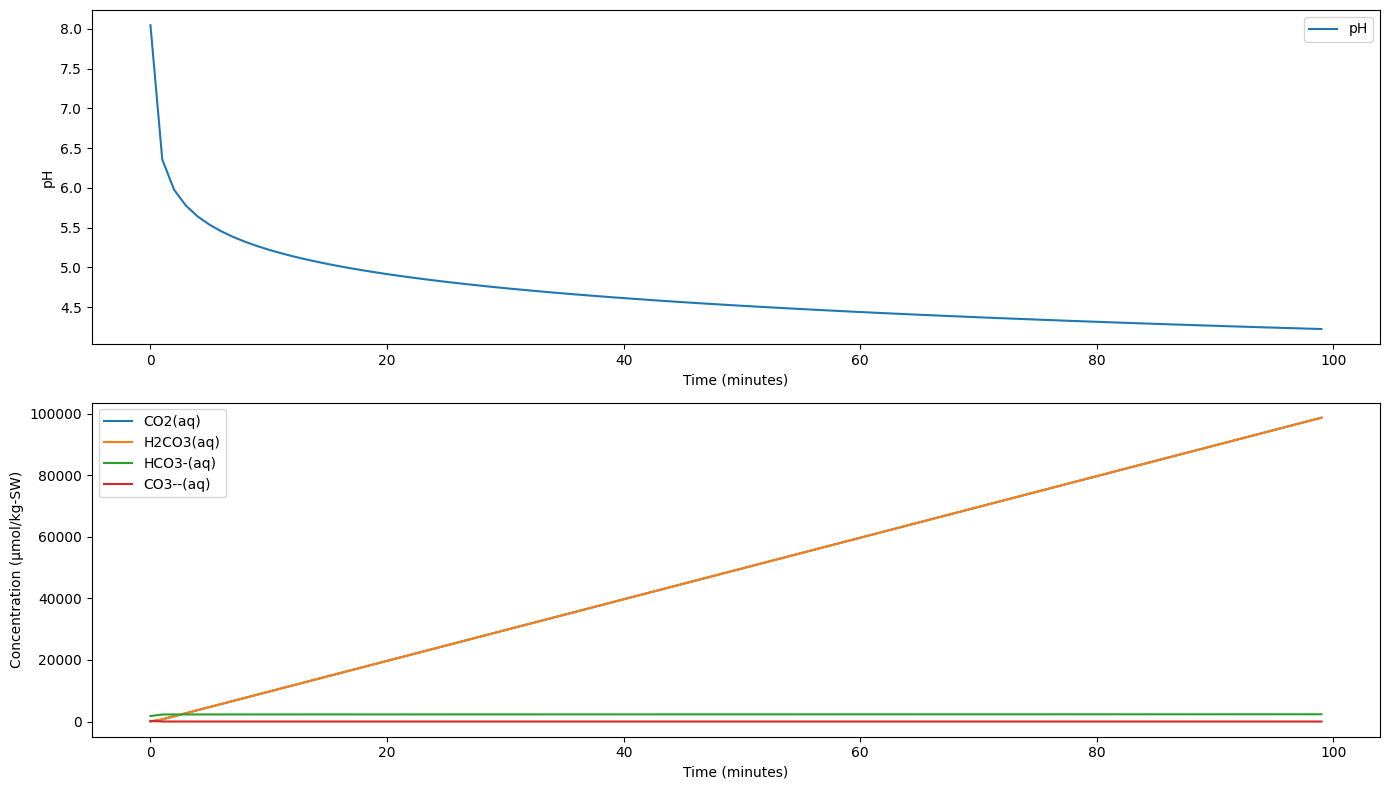

In [6]:
# Define the initial conditions and parameters
initial_pH = 8.1  # Initial pH of seawater
TA = 2300  # Total alkalinity in µmol/kg-SW
DIC_initial = 2000  # Initial dissolved inorganic carbon in µmol/kg-SW
CO2_influx_rate = 1000  # Rate of CO2 influx in µmol/kg-SW per minute
time_steps = 100  # Number of time steps for the simulation
time_interval = 1  # Time interval in minutes

# Arrays to store results
times = np.arange(0, time_steps * time_interval, time_interval)
DIC = np.zeros(time_steps)
pH = np.zeros(time_steps)
CO2_aq = np.zeros(time_steps)
H2CO3_aq = np.zeros(time_steps)
HCO3_aq = np.zeros(time_steps)
CO3_aq = np.zeros(time_steps)

# Constants for CO2SYS
salinity = 35
temperature = 25
pressure = 0
silicate = 0
phosphate = 0
pH_scale = 1
K1K2_constants = 10
KSO4_constants = 1

# Set initial DIC and pH
DIC[0] = DIC_initial
results = CO2SYS(
    PAR1=TA, 
    PAR2=DIC_initial, 
    PAR1TYPE=1, 
    PAR2TYPE=2, 
    SAL=salinity, 
    TEMPIN=temperature, 
    TEMPOUT=temperature, 
    PRESIN=pressure, 
    PRESOUT=pressure, 
    SI=silicate, 
    PO4=phosphate, 
    pHSCALEIN=pH_scale, 
    K1K2CONSTANTS=K1K2_constants, 
    KSO4CONSTANTS=KSO4_constants
)

# Check the keys in the results dictionary
print("Keys in results dictionary:", results.keys())

pH[0] = results['pHout'][0]
CO2_aq[0] = results['CO2out'][0]
H2CO3_aq[0] = results['CO2out'][0]  # There is no separate key for H2CO3, it is part of CO2out
HCO3_aq[0] = results['HCO3out'][0]
CO3_aq[0] = results['CO3out'][0]

# Time loop to simulate CO2 bubbling into water
for i in range(1, time_steps):
    DIC[i] = DIC[i-1] + CO2_influx_rate * time_interval
    results = CO2SYS(
        PAR1=TA, 
        PAR2=DIC[i], 
        PAR1TYPE=1, 
        PAR2TYPE=2, 
        SAL=salinity, 
        TEMPIN=temperature, 
        TEMPOUT=temperature, 
        PRESIN=pressure, 
        PRESOUT=pressure, 
        SI=silicate, 
        PO4=phosphate, 
        pHSCALEIN=pH_scale, 
        K1K2CONSTANTS=K1K2_constants, 
        KSO4CONSTANTS=KSO4_constants
    )
    pH[i] = results['pHout'][0]
    CO2_aq[i] = results['CO2out'][0]
    H2CO3_aq[i] = results['CO2out'][0]
    HCO3_aq[i] = results['HCO3out'][0]
    CO3_aq[i] = results['CO3out'][0]

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot pH
plt.subplot(2, 1, 1)
plt.plot(times, pH, label='pH')
plt.xlabel('Time (minutes)')
plt.ylabel('pH')
plt.legend()

# Plot concentrations
plt.subplot(2, 1, 2)
plt.plot(times, CO2_aq, label='CO2(aq)')
plt.plot(times, H2CO3_aq, label='H2CO3(aq)')
plt.plot(times, HCO3_aq, label='HCO3-(aq)')
plt.plot(times, CO3_aq, label='CO3--(aq)')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (µmol/kg-SW)')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PyCO2SYS import CO2SYS

# Define the initial conditions and parameters
initial_pH = 13  # Initial pH of seawater
TA = 1000000  # Total alkalinity in µmol/kg-SW
DIC_initial = 2000  # Initial dissolved inorganic carbon in µmol/kg-SW
CO2_influx_rate = 10  # Rate of CO2 influx in µmol/kg-SW per minute
time_steps = 100  # Number of time steps for the simulation
time_interval = 1440  # Time interval in minutes

# Arrays to store results
times = np.arange(0, time_steps * time_interval, time_interval)
DIC = np.zeros(time_steps)
pH = np.zeros(time_steps)
CO2_aq = np.zeros(time_steps)
H2CO3_aq = np.zeros(time_steps)
HCO3_aq = np.zeros(time_steps)
CO3_aq = np.zeros(time_steps)

# Constants for CO2SYS
salinity = 0
temperature = 25
pressure = 0
silicate = 0
phosphate = 0
pH_scale = 1
K1K2_constants = 10
KSO4_constants = 1

# Set initial DIC and pH
DIC[0] = DIC_initial
results = CO2SYS(
    PAR1=TA, 
    PAR2=DIC_initial, 
    PAR1TYPE=1, 
    PAR2TYPE=2, 
    SAL=salinity, 
    TEMPIN=temperature, 
    TEMPOUT=temperature, 
    PRESIN=pressure, 
    PRESOUT=pressure, 
    SI=silicate, 
    PO4=phosphate, 
    pHSCALEIN=pH_scale, 
    K1K2CONSTANTS=K1K2_constants, 
    KSO4CONSTANTS=KSO4_constants
)

pH[0] = results['pHout'][0]
CO2_aq[0] = results['CO2out'][0] * 0.95  # Assuming 95% of CO2out is CO2(aq)
H2CO3_aq[0] = results['CO2out'][0] * 0.05  # Assuming 5% of CO2out is H2CO3(aq)
HCO3_aq[0] = results['HCO3out'][0]  # µM
CO3_aq[0] = results['CO3out'][0]  # µM

# Time loop to simulate CO2 bubbling into water
for i in range(1, time_steps):
    DIC[i] = DIC[i-1] + CO2_influx_rate * time_interval
    results = CO2SYS(
        PAR1=TA, 
        PAR2=DIC[i], 
        PAR1TYPE=1, 
        PAR2TYPE=2, 
        SAL=salinity, 
        TEMPIN=temperature, 
        TEMPOUT=temperature, 
        PRESIN=pressure, 
        PRESOUT=pressure, 
        SI=silicate, 
        PO4=phosphate, 
        pHSCALEIN=pH_scale, 
        K1K2CONSTANTS=K1K2_constants, 
        KSO4CONSTANTS=KSO4_constants
    )
    pH[i] = results['pHout'][0]
    CO2_aq[i] = results['CO2out'][0] * 0.95  # Assuming 95% of CO2out is CO2(aq)
    H2CO3_aq[i] = results['CO2out'][0] * 0.05  # Assuming 5% of CO2out is H2CO3(aq)
    HCO3_aq[i] = results['HCO3out'][0]  # µM
    CO3_aq[i] = results['CO3out'][0]  # µM




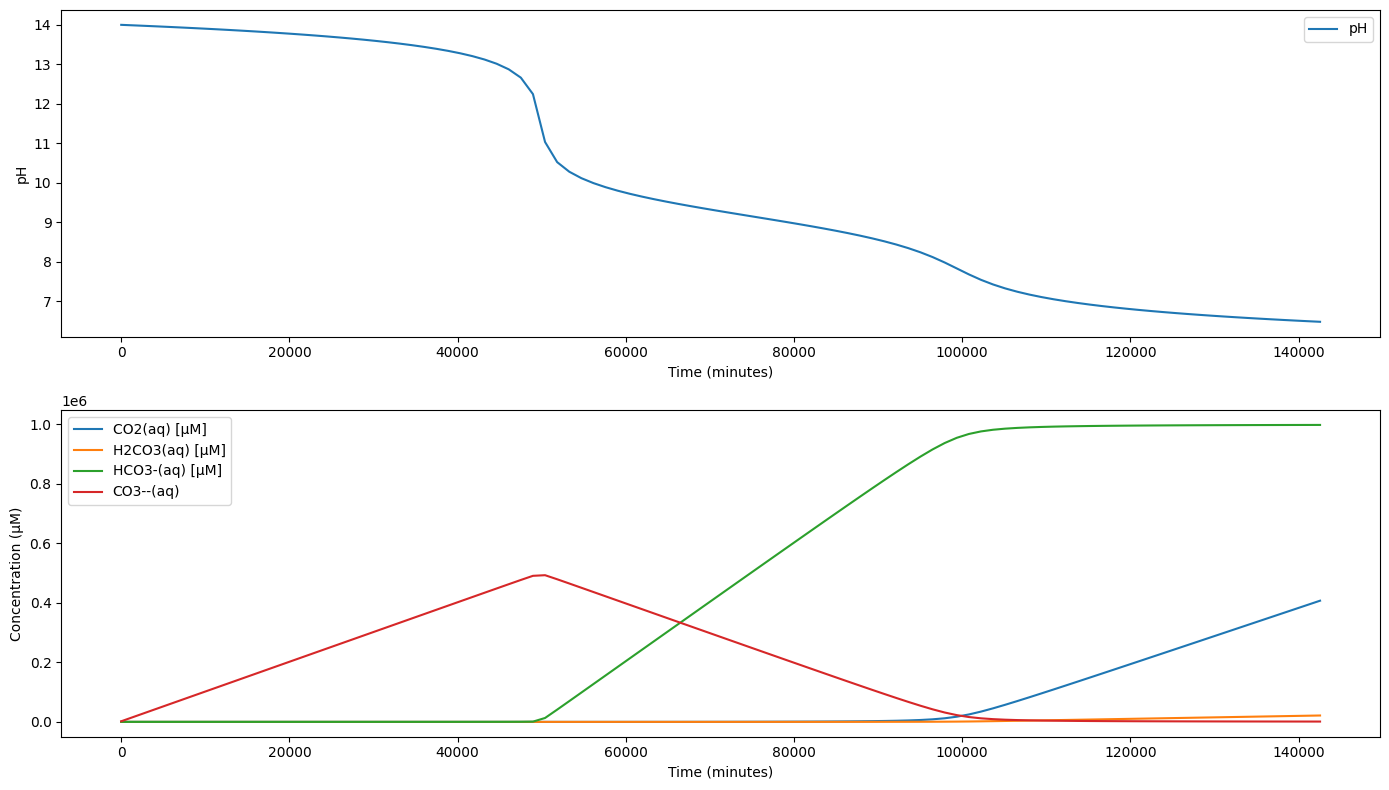

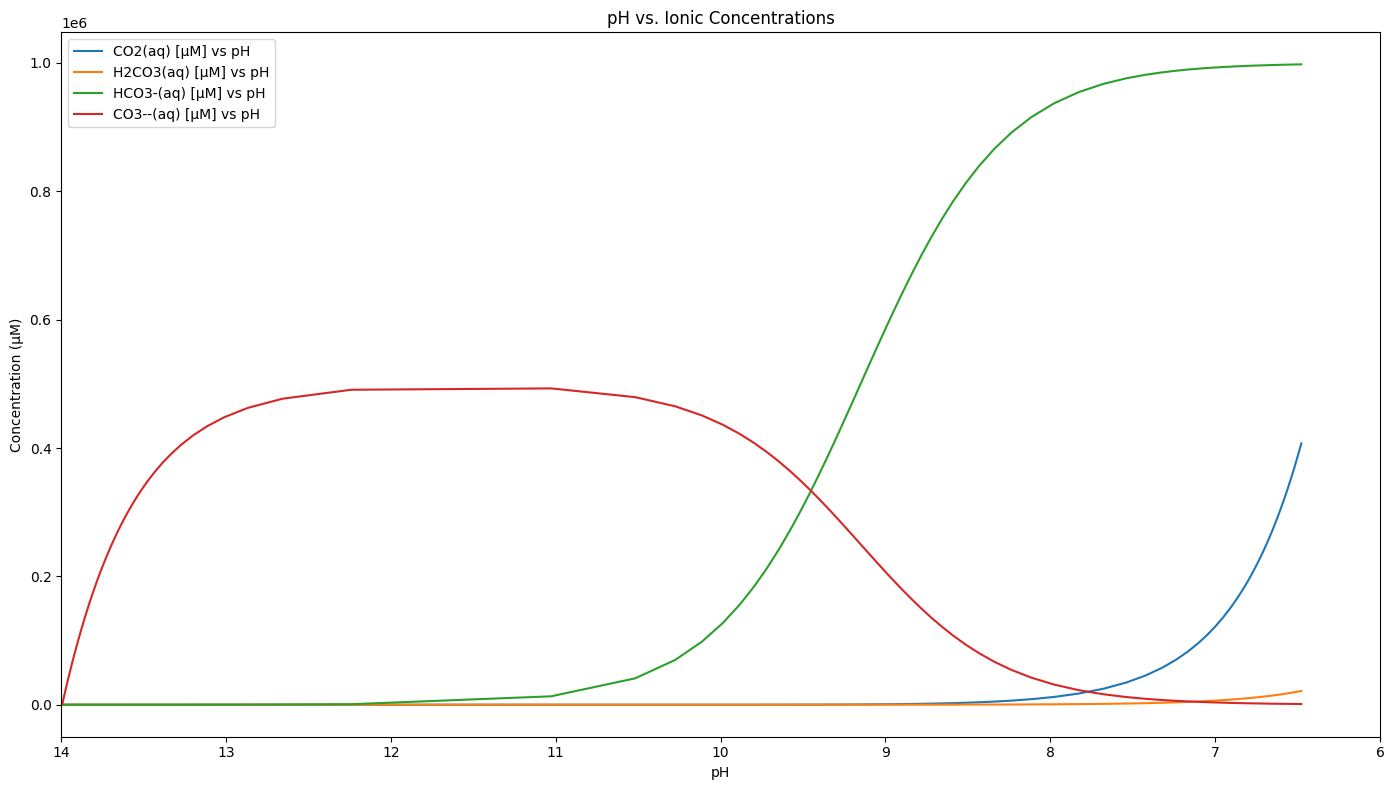

In [24]:
# Plotting the results
plt.figure(figsize=(14, 8))

# Plot pH
plt.subplot(2, 1, 1)
plt.plot(times, pH, label='pH')
plt.xlabel('Time (minutes)')
plt.ylabel('pH')
plt.legend()

# Plot concentrations in µM
plt.subplot(2, 1, 2)
plt.plot(times, CO2_aq, label='CO2(aq) [µM]')
plt.plot(times, H2CO3_aq, label='H2CO3(aq) [µM]')
plt.plot(times, HCO3_aq, label='HCO3-(aq) [µM]')
plt.plot(times, CO3_aq, label='CO3--(aq)')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (µM)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot pH vs. ionic concentrations
plt.figure(figsize=(14, 8))

# Plot pH vs CO2(aq)
plt.plot(pH, CO2_aq, label='CO2(aq) [µM] vs pH')

# Plot pH vs H2CO3(aq)
plt.plot(pH, H2CO3_aq, label='H2CO3(aq) [µM] vs pH')

# Plot pH vs HCO3-(aq)
plt.plot(pH, HCO3_aq, label='HCO3-(aq) [µM] vs pH')

# Plot pH vs CO3--(aq)
plt.plot(pH, CO3_aq, label='CO3--(aq) [µM] vs pH')

plt.xlabel('pH')
plt.ylabel('Concentration (µM)')
plt.legend()
plt.title('pH vs. Ionic Concentrations')
plt.tight_layout()
plt.xlim(14,6)
plt.show()